In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data=data.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score(1-100)':'score'})

In [7]:
data = data.drop('CustomerID', axis=1)
data

,gender,age,income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  200 non-null    object
 1   age                     200 non-null    int64 
 2   income                  200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
data.shape

(200, 4)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['gender']=label_encoder.fit_transform(data['gender'])

data['gender'].unique()


array([1, 0])

In [11]:
data.describe()

,gender,age,income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


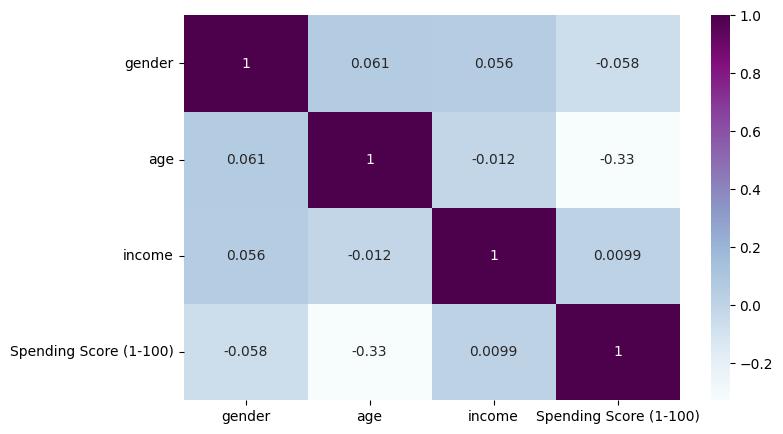

In [12]:
# finding correlation between all parameters
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="BuPu",ax=ax)
plt.show()

In [16]:
# seperate for upper than 50 scores
mask=data['Spending Score (1-100)']>50
upper_50=data[mask]
upper_50

,gender,age,income,Spending Score (1-100)
1,1,21,15,81
3,0,23,16,77
5,0,22,17,76
7,0,23,18,94
9,0,30,19,72
...,...,...,...,...
191,0,32,103,69
193,0,38,113,91
195,0,35,120,79
197,1,32,126,74


In [17]:
upper_50.describe()

,gender,age,income,Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,0.453608,34.597938,60.412371,71.670103
std,0.500429,13.024544,26.756133,14.710910
min,0.000000,18.000000,15.000000,51.000000
25%,0.000000,26.000000,42.000000,57.000000
50%,0.000000,31.000000,60.000000,73.000000
75%,1.000000,38.000000,78.000000,85.000000
max,1.000000,70.000000,137.000000,99.000000


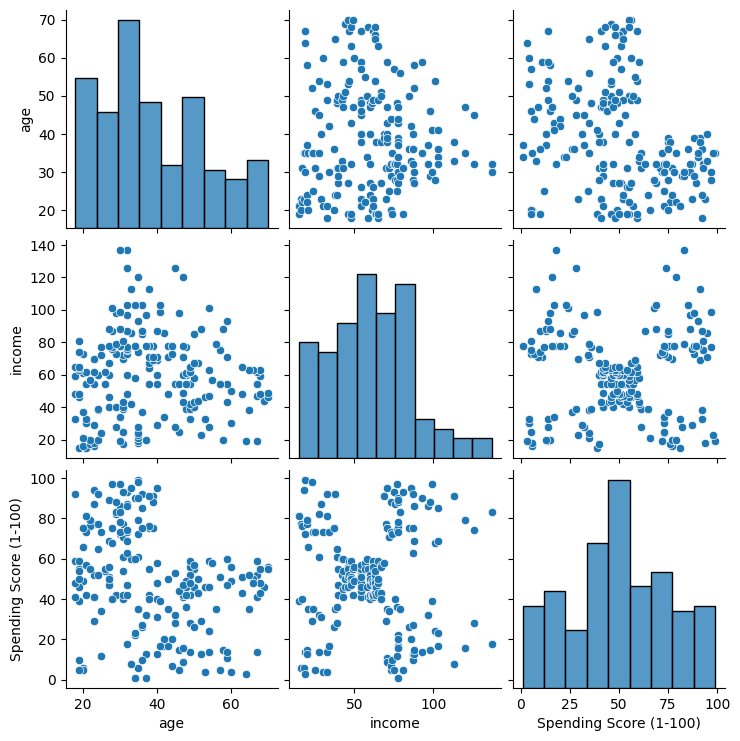

In [19]:
# histrogram
# for visualization
sns.pairplot(data,vars=['age','income','Spending Score (1-100)'])
plt.show()

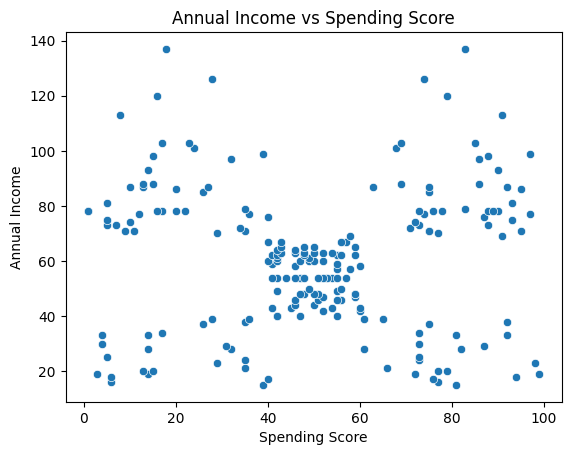

In [20]:
sns.scatterplot(x='Spending Score (1-100)',y='income',data=data)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [21]:
# split
# k-mean cluster

X=data.iloc[:,[2,3]]
print(f"X shape: {X.shape}")
X.head()

X shape: (200, 2)


,income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Cluster using k-means**


In [22]:
# segmentation using annual income and spending score
n_clusters = range(2 , 13)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:5])
print()
print("Silhouette Scores:", silhouette_scores[:5])

Inertia: [183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947]

Silhouette Scores: [np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378)]


In [23]:
# Elbow plot
fig = px.line(x= range(2 , 13) , y= inertia_errors , title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()

In [24]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x= n_clusters , y= silhouette_scores , title= "K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

In [25]:
# The best number of cluster is 5
final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [26]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

[4 2 4 2 4]


In [28]:
test_labels = final_model.fit_predict(data[['age', 'income']])
test_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [29]:
test_labels = final_model.predict([[50, 30]])
test_labels

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([4], dtype=int32)

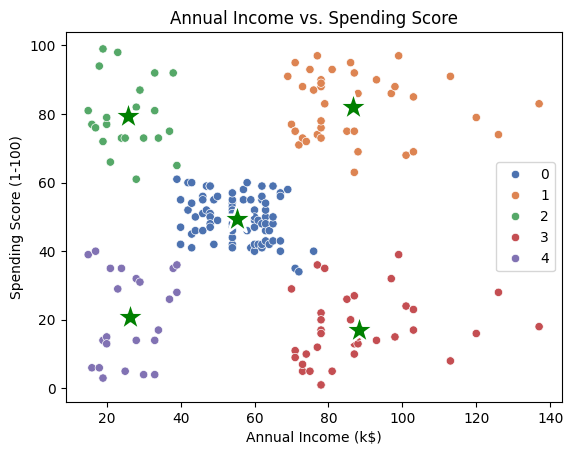

In [34]:
# communicate
# plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=data['income'] , y= data['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'green',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

In [35]:
# Create side-by-side bar chart of `xgb`
xgb= X.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()